In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
df = pd.read_csv('./data/spotify_millsongdata.csv').drop('link', axis=1)
df.head()

,artist,song,text
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante","Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...


In [7]:
df.describe()

,artist,song,text
count,57650,57650,57650
unique,643,44824,57494
top,Donna Summer,Have Yourself A Merry Little Christmas,I just came back from a lovely trip along the ...
freq,191,35,6


In [9]:
df.isnull().sum()

artist    0
song      0
text      0
dtype: int64

In [10]:
df['content'] = df['artist'] + ' ' + df['song']+ ' '+ df['text']
df['content']

0        ABBA Ahe's My Kind Of Girl Look at her face, i...
1        ABBA Andante, Andante Take it easy with me, pl...
2        ABBA As Good As New I'll never know why I had ...
3        ABBA Bang Making somebody happy is a question ...
4        ABBA Bang-A-Boomerang Making somebody happy is...
                               ...                        
57645    Ziggy Marley Good Old Days Irie days come on p...
57646    Ziggy Marley Hand To Mouth Power to the worker...
57647    Zwan Come With Me all you need  \r\nis somethi...
57648    Zwan Desire northern star  \r\nam i frightened...
57649    Zwan Heartsong come in  \r\nmake yourself at h...
Name: content, Length: 57650, dtype: object

In [11]:
df.head()

,artist,song,text,content
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \r\nA...","ABBA Ahe's My Kind Of Girl Look at her face, i..."
1,ABBA,"Andante, Andante","Take it easy with me, please \r\nTouch me gen...","ABBA Andante, Andante Take it easy with me, pl..."
2,ABBA,As Good As New,I'll never know why I had to go \r\nWhy I had...,ABBA As Good As New I'll never know why I had ...
3,ABBA,Bang,Making somebody happy is a question of give an...,ABBA Bang Making somebody happy is a question ...
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...,ABBA Bang-A-Boomerang Making somebody happy is...


In [13]:
tfidf_vec = TfidfVectorizer(stop_words='english', lowercase=True, token_pattern=r'(?u)\b[A-Za-z]+\b')
X_tfidf = tfidf_vec.fit_transform(df['content'])
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vec.get_feature_names_out())
tfidf_df

,aa,aaa,aaaa,aaaaaa,aaaaaaa,aaaaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaahhhhhhhhhhhhhhhhhhhhhhhhhh,aaaaaaaaaaaaah,aaaaaaaaaah,aaaaaaaaaahhh,...,zy,zyada,zydeco,zydine,zz,zzay,zzt,zzy,zzzz,zzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


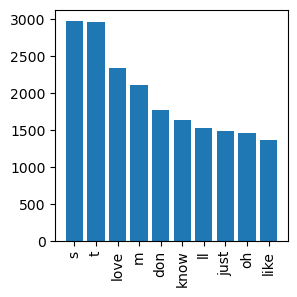

In [14]:
# plot bag of words most common words
plt.figure(figsize=(10, 5))
plt.bar(*zip(*tfidf_df.sum().sort_values(ascending=False)[:50].items()))
plt.xticks(rotation=90)
plt.show()